
# Tapei, Taiwan - House Price Predictor

Citation: Real estate valuation data set. (2018). UCI Machine Learning Repository. https://doi.org/10.24432/C5J30W.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,AGE,MTRODIST,STORNUM,LAT,LONG,PRICE
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       414 non-null    float64
 1   MTRODIST  414 non-null    float64
 2   STORNUM   414 non-null    int64  
 3   LAT       414 non-null    float64
 4   LONG      414 non-null    float64
 5   PRICE     414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [5]:
housing.describe()

,AGE,MTRODIST,STORNUM,LAT,LONG,PRICE
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'MTRODIST'}>],
       [<Axes: title={'center': 'STORNUM'}>,
        <Axes: title={'center': 'LAT'}>],
       [<Axes: title={'center': 'LONG'}>,
        <Axes: title={'center': 'PRICE'}>]], dtype=object)

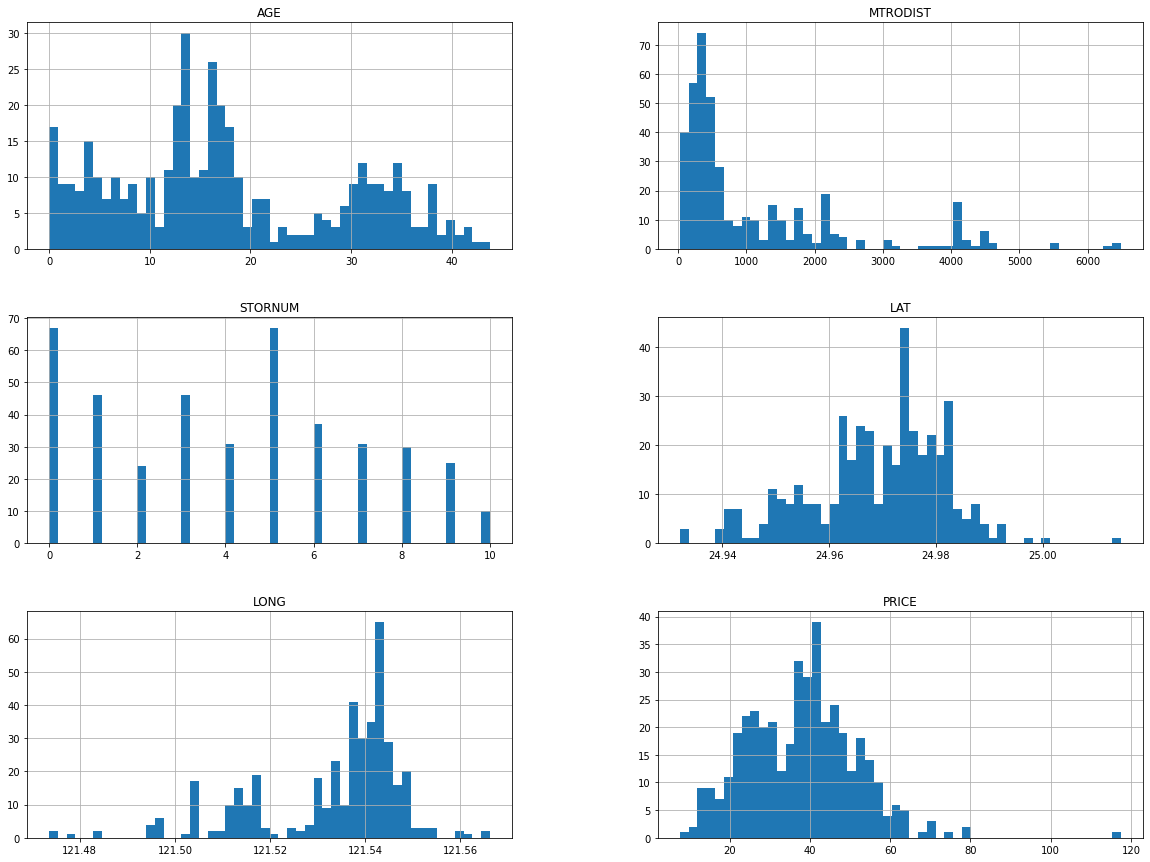

In [6]:
# Histogram Plotting
housing.hist(bins = 50, figsize = (20,15))

## Train-Test Splitting

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in Train Set: {len(train_set)}\nRows in Test Set: {len(test_set)}")

Rows in Train Set: 331
Rows in Test Set: 83


In [8]:
housing = train_set.copy()
housing_features = train_set.drop("PRICE", axis = 1)
housing_labels = train_set["PRICE"].copy()

## Looking for Correlations

In [9]:
corr_matrix = housing.corr()

In [10]:
corr_matrix['PRICE'].sort_values(ascending = False)

PRICE       1.000000
STORNUM     0.554251
LAT         0.531052
LONG        0.495413
AGE        -0.214238
MTRODIST   -0.657009
Name: PRICE, dtype: float64

In [11]:
from pandas.plotting import scatter_matrix

<Axes: xlabel='STORNUM', ylabel='PRICE'>

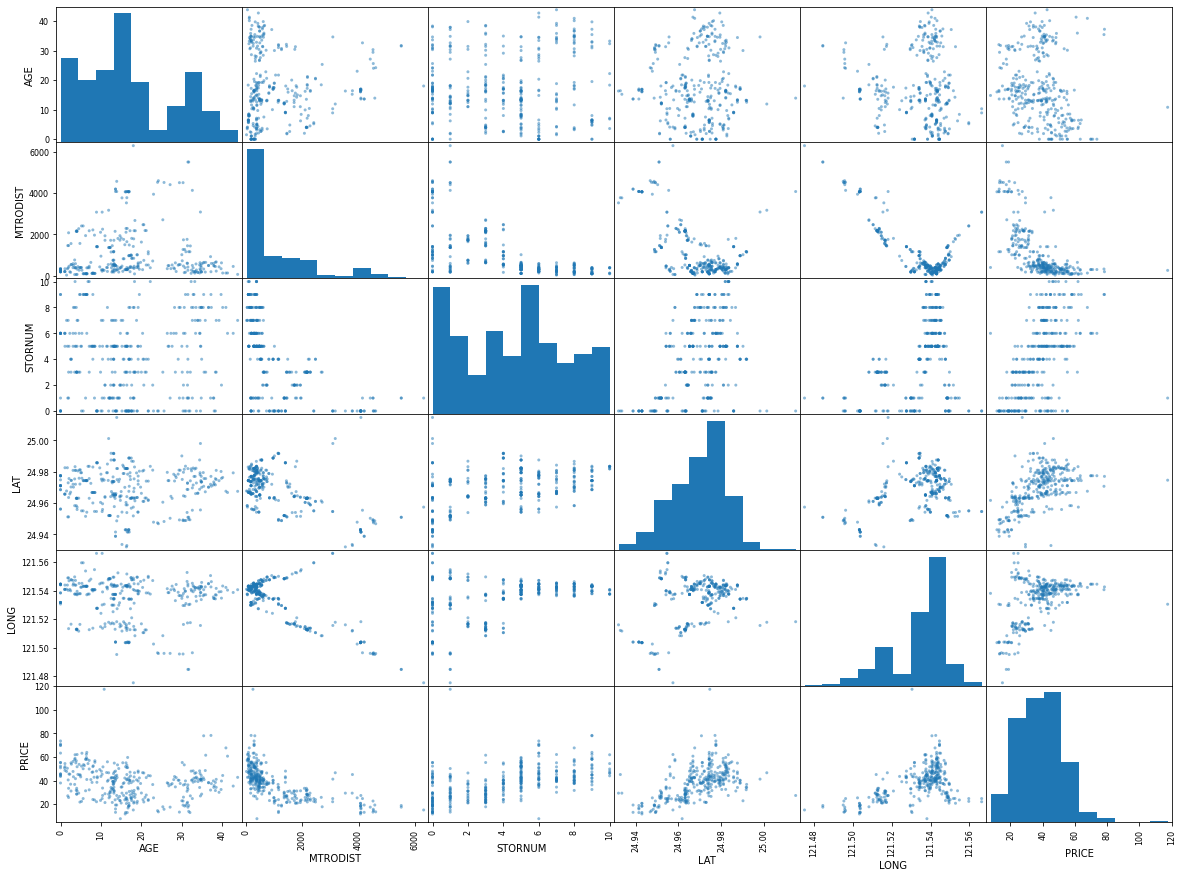

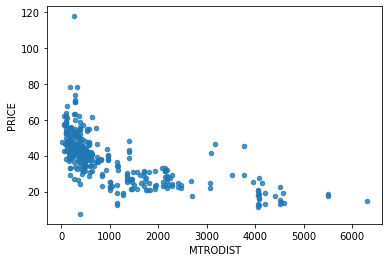

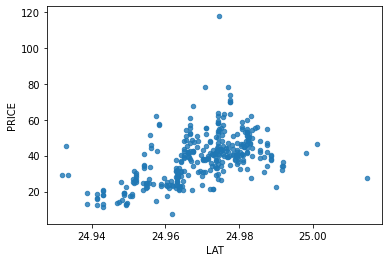

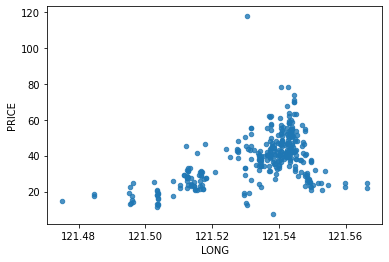

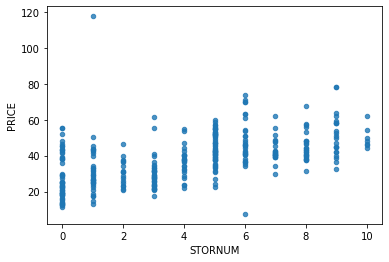

In [12]:
#Various Plots to understand the correlation

scatter_matrix(housing, figsize =(20,15))
housing.plot(kind = "scatter", x = "MTRODIST", y="PRICE", alpha = 0.8)
housing.plot(kind = "scatter", x = "LAT", y="PRICE", alpha = 0.8)
housing.plot(kind = "scatter", x = "LONG", y="PRICE", alpha = 0.8)
housing.plot(kind = "scatter", x = "STORNUM", y="PRICE", alpha = 0.8)

## Creating a Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [14]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

In [15]:
housing_num = my_pipeline.fit_transform(housing_features)

## Selecting a Desired Model

In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num, housing_labels)

RandomForestRegressor()

In [17]:
some_data = housing_features.iloc[:5]
some_labels = np.array(housing_labels.iloc[:5])
prepared_data = my_pipeline.transform(some_data)

In [18]:
model.predict(prepared_data)

array([48.155     , 24.936     , 29.468     , 38.52189048, 42.8921    ])

In [19]:
some_labels

array([42.7, 23.9, 32.1, 38.3, 40.8])

## Evaluating the Model

In [20]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [21]:
rmse

3.23396377048021

## Using better evaluation: Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num, housing_labels, scoring = 'neg_mean_squared_error', cv=10)

In [23]:
def print_validation(scores):
    rmse_scores = np.sqrt(-scores)
    print(f"Mean RMSE Score: {np.mean(rmse_scores)}\nSTD: {np.std(rmse_scores)}")

In [24]:
print_validation(scores)

Mean RMSE Score: 8.009027390268859
STD: 2.3847445764015895


After checking, it is revealed that the lowest scores are for Random Forest Regressor.

## Saving the Model

In [25]:
from joblib import dump, load
dump(model, 'Taiwan Houses.joblib')

['Taiwan Houses.joblib']

## Model Testing

In [26]:
X_test = test_set.drop("PRICE", axis = 1)
Y_test = test_set["PRICE"].copy()

X_test_prepared = my_pipeline.transform(X_test)

final_predictions = model.predict(X_test_prepared)

final_scores = cross_val_score(model, X_test_prepared, Y_test, scoring = 'neg_mean_squared_error', cv=10)

print_validation(final_scores)

Mean RMSE Score: 7.421114503945523
STD: 2.364007767466982


In [27]:
for index, value in enumerate(final_predictions):
    print(f"Prediction: {round(value,2)}\nActual: {list(Y_test)[index]}\nDifference: {round(abs((value)-list(Y_test)[index]),2)}\n")

Prediction: 50.96
Actual: 45.1
Difference: 5.86

Prediction: 36.01
Actual: 42.3
Difference: 6.29

Prediction: 55.62
Actual: 52.2
Difference: 3.42

Prediction: 33.89
Actual: 37.3
Difference: 3.41

Prediction: 26.06
Actual: 22.8
Difference: 3.26

Prediction: 39.3
Actual: 36.3
Difference: 3.0

Prediction: 45.49
Actual: 53.0
Difference: 7.51

Prediction: 53.41
Actual: 51.4
Difference: 2.01

Prediction: 14.83
Actual: 16.1
Difference: 1.27

Prediction: 59.37
Actual: 59.0
Difference: 0.37

Prediction: 24.68
Actual: 30.6
Difference: 5.92

Prediction: 30.99
Actual: 30.7
Difference: 0.29

Prediction: 34.28
Actual: 35.6
Difference: 1.32

Prediction: 14.22
Actual: 13.7
Difference: 0.52

Prediction: 38.41
Actual: 62.9
Difference: 24.49

Prediction: 25.04
Actual: 30.5
Difference: 5.46

Prediction: 39.22
Actual: 41.9
Difference: 2.68

Prediction: 58.23
Actual: 54.4
Difference: 3.83

Prediction: 24.81
Actual: 29.5
Difference: 4.69

Prediction: 36.31
Actual: 43.7
Difference: 7.39

Prediction: 18.42
Act

## Using the Model

In [28]:
random_features = [[32, 500.59470, 5, 24.98034, 121.53951]]
random_features_prepared = my_pipeline.transform(random_features)

random_predictions = model.predict(random_features_prepared)

random_predictions

C:\Users\khatu\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([37.057])